In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
from matplotlib.patches import Arc
from matplotlib import collections  as mc
import time
from IPython import display

In [101]:
def initNRandConn(n, a, b,):
    Data=pd.DataFrame({"person":list(range(n))})
    x=random.sample(range(1,10*n),n);
    x=np.array(x);
    #x=x**(1/2);
    x.sort();
    Data['X']=x;
    y=np.array([random.randrange(1,int(10*n),1) for _ in range (n)]);
    #y=y**(1/2);
    Data['Y']=y;

    for x in range(0,n):
        Data[str(x)]=0
    for x in range(0,n-1):
        Data.iloc[x,3:3+n]=(((Data.loc[x,'X']-Data.loc[:,'X'])**2+(Data.loc[x,'Y']-Data.loc[:,'Y'])**2)**(1/2)).values;
        num_connections=random.randint(a,b)
        temp=Data.iloc[x,3:3+n].sort_values().index[0:num_connections].values;
        temp=[3+int(i) for i in temp];
        Data.iloc[x,3:3+n]=0
        Data.iloc[x,temp]=1
    for x in range(0,n):
        Data.iloc[:,3+x]=Data.iloc[x,3:3+n].values
    subset=[];
    for y in range(0,n):
        a=Data.iloc[y,3:]==1;
        bX=Data.loc[a.values,'X']
        bY=Data.loc[a.values,'Y']
        for x in range(0,len(bX)):
            subset.append([(Data.loc[y,'X'],Data.loc[y,'Y']),(bX.values[x],bY.values[x])])
    Data['Sick']=0
    Data['Vac']=0
    Data['GS']=0
    Data['Critical']=0
    Data['Dead']=0
    Data['Caught']=0
    return Data, n, subset

def initSick(N):
    Data['Sick']=0
    Data.loc[random.sample(range(n),N),'Sick']=1
    return Data

#Vaccine def
def Vac(pop):
    Data['Vac']=np.array([random.random() for _ in range (len(Data))])
    Data.loc[Data['Vac']>1-pop,'Vac']=1
    Data.loc[Data['Vac']<=1-pop,'Vac']=0
    return Data

def spreadAdv(IllPercent, RecPercent, vacEffectiveness,DeathRate, criticalRate):
    Data.loc[Data['Sick']==True,'Caught']=1 #label to know who has ever been sick.
    Data['GS']=0;
    l=len(Data.loc[(np.sum(Data.iloc[Data.loc[Data['Sick']==1].index.values,3:3+n])>0).values,'GS']);
    temp=(np.sum(Data.iloc[Data.loc[Data['Sick']==1].index.values,3:3+n])>0).values;
    RandList=np.array([random.random() for _ in range (l)]);
    Data.loc[temp,'GS']=Data.loc[temp,'Sick']+RandList
    #above, assigns random number to column GS with extra emphesis on sick people staying sick.
    #below, reduces random number by fixed amount if person at risk of getting sick is vacinated.
    Data.loc[(Data['GS']>0)&(Data['Sick']==0),'GS']=(Data.loc[(Data['GS']>0)&(Data['Sick']==0),'GS']-
                                                     vacEffectiveness*Data.loc[(Data['GS']>0)&(Data['Sick']==0),'Vac'])

    #making people ill.
    Data.loc[Data['GS']>1-IllPercent,'Sick']=1
    #check if critical individual
    test=Data.loc[(Data['GS']>2-criticalRate)&(Data['Critical']==1)].index.values
    Data.iloc[test,3:3+n]=0;
    test2=[];
    for x in test:
        test2.append(str(x));
    Data[test2]=0;
    Data.loc[test,'Dead']=1
    #checking if previously sick individual recovers and gains vac protection.
    Data.loc[(Data['GS']>1)&(Data['GS']<1+RecPercent),['Sick','Vac']]=0,1
    #Chance a sick person dies:
    test=Data.loc[(Data['GS']>2-DeathRate)&(Data['Dead']==0)].index.values
    Data.iloc[test,3:3+n]=0;
    test2=[];
    for x in test:
        test2.append(str(x));
    Data[test2]=0;
    Data.loc[test,'Dead']=1 #and assigns death label
    return Data, l, temp

def plotIt2():
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.plot(Data[Data['Sick']==0]['X'],Data[Data['Sick']==0]['Y'],'ro')
    
    subset=[];
    for y in range(0,n):
        a=Data.iloc[y,3:3+n]==1;
        bX=Data.loc[a.values,'X']
        bY=Data.loc[a.values,'Y']
        for x in range(0,len(bX)):
            subset.append([(Data.loc[y,'X'],Data.loc[y,'Y']),(bX.values[x],bY.values[x])])   
    lines=subset
    lc = mc.LineCollection(lines, linewidths=1)
    ax.add_collection(lc)
    ax.plot(Data[Data['Caught']==1]['X'],Data[Data['Caught']==1]['Y'],'go', ms=10)
    ax.plot(Data[(Data['Sick']==0)&(Data['Vac']==1)]['X'],Data[(Data['Sick']==0)&(Data['Vac']==1)]['Y'],'bo')
    ax.plot(Data[(Data['Sick']==0)&(Data['Critical']==1)]['X'],Data[(Data['Sick']==0)&(Data['Critical']==1)]['Y'],'yo')
    ax.plot(Data[Data['Sick']==1]['X'],Data[Data['Sick']==1]['Y'],'go')
    try:
        ax.plot(Data[Data['Dead']==1]['X'],Data[Data['Dead']==1]['Y'],'ko')
    except:
        pass
    plt.axis([0, 10*n, 0, 10*n])
    plt.axes().set_aspect('equal')
    
def criticalPop(m):
    critical=list(Data[(Data['Sick']==0)&(Data['Vac']==0)].index.values)
    critical=random.sample(critical,m)
    Data['Critical']=0
    Data.loc[critical,'Critical']=1
    return Data

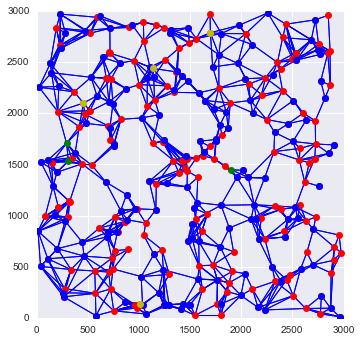

In [205]:
Data, n , subset=initNRandConn(300,4,10)
DataSaved1=Data.copy(deep=True)
Data=Vac(.5)
DataSaved2=Data.copy(deep=True)
Data=criticalPop(4)
DataSaved3=Data.copy(deep=True)
Data=initSick(3)
DataSaved4=Data.copy(deep=True)
plotIt2()

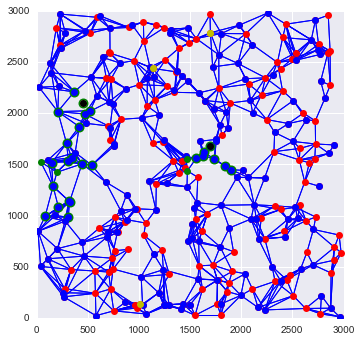

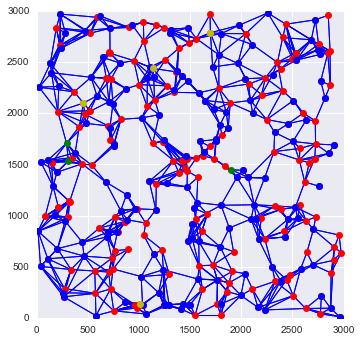

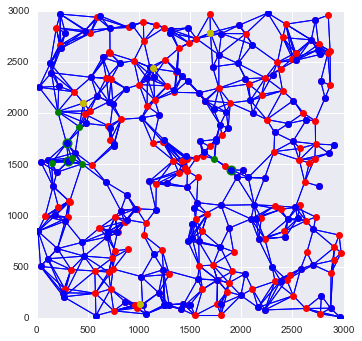

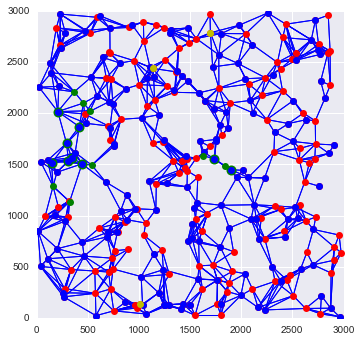

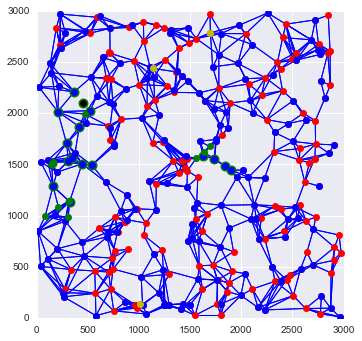

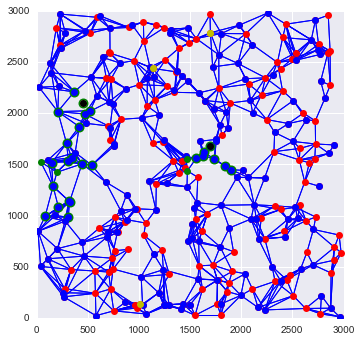

In [206]:
for i in range(5):
    #plt.gca().cla();
    plt.gcf()
    plotIt2()
    Data, l, temp=spreadAdv(.9, 1, .85, .02,.6); #IllPercent, RecPercent, vacEffectiveness,DeathRate, criticalRate
    display.clear_output(wait=True);
    display.display(plt.gcf());
    time.sleep(.1);